# Clustering DBSCAN y K-Means
El análisis de datos en el ámbito de la música puede revelar patrones y tendencias interesantes sobre diferentes géneros musicales. En este estudio, exploramos un conjunto de datos que contiene características de canciones junto con su género musical correspondiente. El objetivo es identificar patrones subyacentes en estas características que puedan ayudar a distinguir entre diferentes géneros musicales.

Para abordar este objetivo, se han seleccionado métodos de aprendizaje no supervisado, específicamente el algoritmo de clustering DBSCAN y el algoritmo de clustering K-Means.

In [ ]:
#Cargamos librerias
# Para visualización de datos
import seaborn as sns

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math as math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Datos y exploración

In [ ]:
# Cargamos el conjunto de datos desde un archivo CSV.
datosp = pd.read_csv('/content/lyrics_music.csv')

In [ ]:
#Eliminamos las filas con datos duplicados
datosp.drop_duplicates(inplace=True)

datosp.duplicated().sum()

# Eliminar filas con valores nulos
datosp.dropna(inplace=True)

In [ ]:
datosp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [ ]:
#Excluimos de la base las columnas de variables categoricas y la fila con el valor nulo
datost = datosp.iloc[ :, [4, 7, 8, 13, 19]]

datost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28372 entries, 0 to 28371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             28372 non-null  object 
 1   dating            28372 non-null  float64
 2   violence          28372 non-null  float64
 3   romantic          28372 non-null  float64
 4   family/spiritual  28372 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.3+ MB


In [ ]:
valores_a_eliminar = ['pop', 'blues', 'jazz', 'rock', 'reggae']

# Eliminar las filas con valores específicos en la columna 'music_genre'
data = datost[~datost['genre'].isin(valores_a_eliminar)]

#valores_a_eliminar = ['sadness', 'world/life', 'music', 'night/time', 'feelings']
# Eliminar las filas con valores específicos en la columna 'music_genre'
#datos = datost[~datost['topic'].isin(valores_a_eliminar)]

In [ ]:
frecuencia_genero = data['genre'].value_counts()

# Mostrar los valores y su frecuencia
print(frecuencia_genero)

country    5445
hip hop     904
Name: genre, dtype: int64


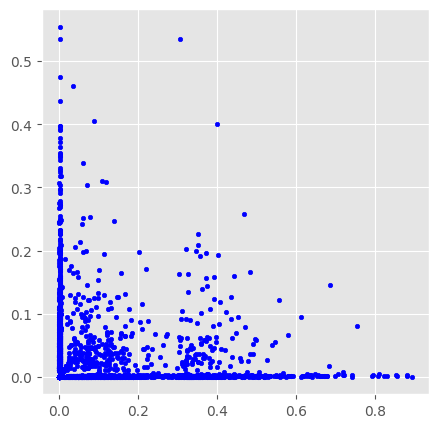

In [ ]:
plt.scatter(data['violence'], data['dating'], s=10, c= "blue")

<Axes: xlabel='violence', ylabel='dating'>

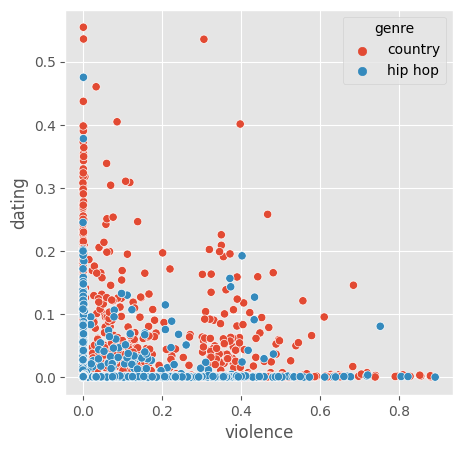

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
sns.scatterplot(
    data = data,
    x = 'violence',
    y = 'dating',
    hue = 'genre'
)

In [ ]:
data_norm = normalize(data)

ValueError: ignored

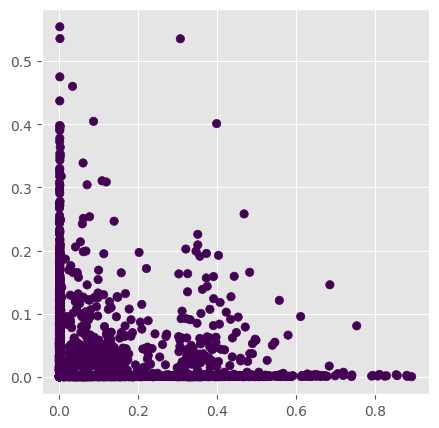

In [ ]:
data['dbscan'] = DBSCAN(eps=32, min_samples=5).fit_predict(data[['violence', 'dating']])

plt.scatter(
    data['violence'],
    data['dating'],
    c = data['dbscan']
)

<Axes: xlabel='violence', ylabel='dating'>

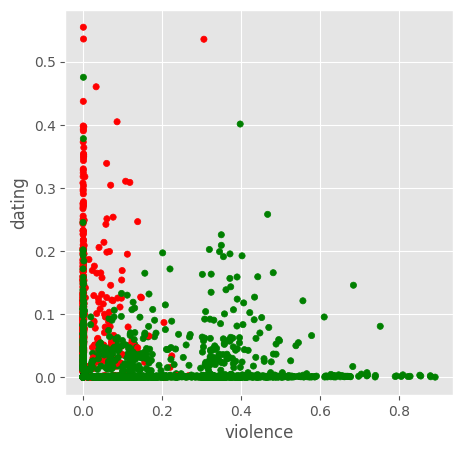

In [ ]:
data['genre'] = pd.factorize(data['genre'])[0]

data_norm = normalize(data)

preds = KMeans(n_clusters = 2, random_state =123).fit_predict(data_norm)

cols = {
  0: 'r',
  1: 'g',
  2: 'b'
}

data['kmeans_pred'] = [cols.get(pred) for pred in preds]
data.plot.scatter('violence', 'dating', c='kmeans_pred')

Text(0, 0.5, 'Distance')

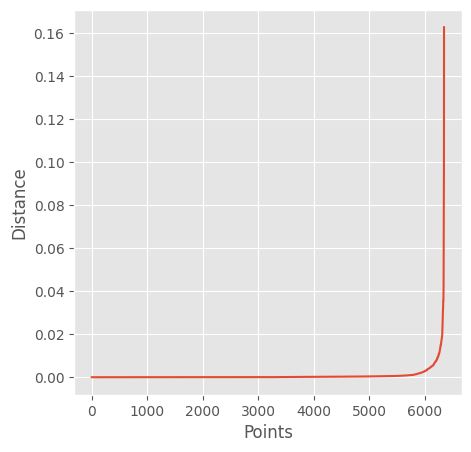

In [ ]:
k = 2
data_nn = data.copy()[['violence', 'dating']]

# Calculate NN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

# Get distances
distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i,
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

Los resultados obtenidos a través de los métodos de clustering DBSCAN y K-Means han proporcionado una visión útil sobre la estructura subyacente de los datos musicales y la agrupación de canciones en diferentes géneros.

DBSCAN ha identificado grupos de canciones que comparten similitudes en términos de características como la violencia y la temática de citas, lo que nos permite explorar la diversidad dentro de cada género musical. Por otro lado, K-Means ha agrupado las canciones en clústeres más definidos, lo que nos permite una clasificación más precisa de las canciones en diferentes géneros.